In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv("../data/processed/store_train.csv")
test  = pd.read_csv("../data/processed/store_test.csv")

train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])


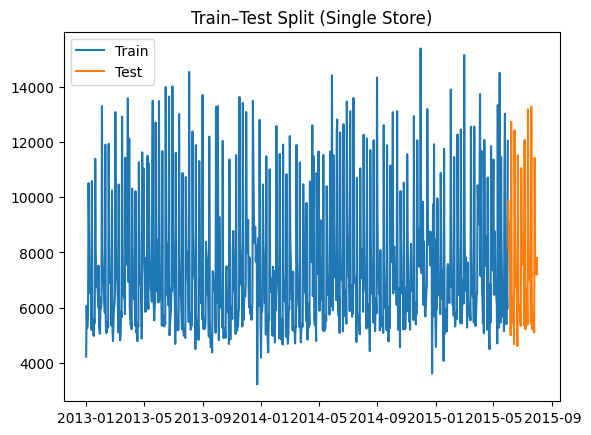

In [3]:
plt.figure()
plt.plot(train['Date'], train['Sales'], label='Train')
plt.plot(test['Date'], test['Sales'], label='Test')
plt.legend()
plt.title("Train–Test Split (Single Store)")
plt.show()


In [4]:
naive_forecast = np.repeat(
    train['Sales'].iloc[-1],
    len(test)
)

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, rmse, mape


In [6]:
naive_mae, naive_rmse, naive_mape = evaluate(
    test['Sales'],
    naive_forecast
)

naive_mae, naive_rmse, naive_mape


(4707.44262295082,
 np.float64(5102.253436585402),
 np.float64(75.00900098166187))

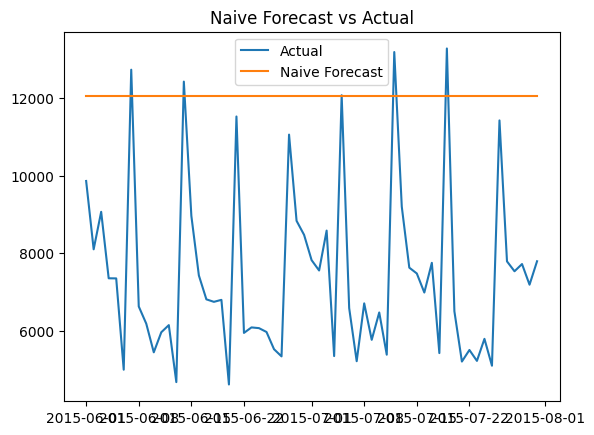

In [7]:
plt.figure()
plt.plot(test['Date'], test['Sales'], label='Actual')
plt.plot(test['Date'], naive_forecast, label='Naive Forecast')
plt.legend()
plt.title("Naive Forecast vs Actual")
plt.show()


In [8]:
window = 7

moving_avg = train['Sales'].rolling(window).mean().iloc[-1]

ma_forecast = np.repeat(moving_avg, len(test))


In [9]:
ma_mae, ma_rmse, ma_mape = evaluate(
    test['Sales'],
    ma_forecast
)

ma_mae, ma_rmse, ma_mape


(1906.461358313817,
 np.float64(2298.0178500489346),
 np.float64(27.549826126606753))

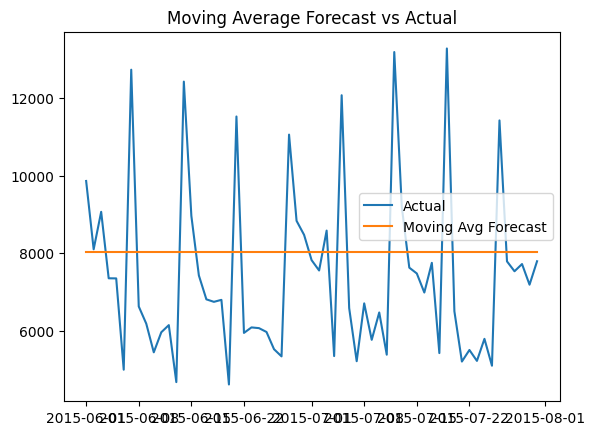

In [10]:
plt.figure()
plt.plot(test['Date'], test['Sales'], label='Actual')
plt.plot(test['Date'], ma_forecast, label='Moving Avg Forecast')
plt.legend()
plt.title("Moving Average Forecast vs Actual")
plt.show()


In [11]:
baseline_results = pd.DataFrame({
    'Model': ['Naive', 'Moving Average'],
    'MAE': [naive_mae, ma_mae],
    'RMSE': [naive_rmse, ma_rmse],
    'MAPE': [naive_mape, ma_mape]
})

baseline_results


,Model,MAE,RMSE,MAPE
0,Naive,4707.442623,5102.253437,75.009001
1,Moving Average,1906.461358,2298.017850,27.549826


In [12]:
baseline_results.to_csv(
    "../models/baseline/baseline_metrics.csv",
    index=False
)


### Phase 6 Summary — Baseline Models

Two baseline models were implemented: a naive persistence model and a 7-day moving average model.
These baselines establish a minimum performance threshold.
All advanced forecasting models must outperform these baselines to justify additional complexity.
